<a href="https://colab.research.google.com/github/arya1406/weather-forecasting/blob/master/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import library yang dibutuhkan

import numpy as np
import pandas as pd
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import tensorflow as tf

# untuk menginstall library loss plot 
!pip install livelossplot

In [ ]:
# mengekstraksi file data yang berbentuk zip
import zipfile,os,shutil,random
import numpy as np

zip_data = '29_2150_bundle_archive.zip'
zip_ext = zipfile.ZipFile(zip_data, 'r')
zip_ext.extractall('/tmp')
zip_ext.close()

In [ ]:
# inisialisasi dataset

df = pd.read_csv('/tmp/GlobalLandTemperaturesByCity.csv')
df

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
...,...,...,...,...,...,...,...
8599207,2013-05-01,11.464,0.236,Zwolle,Netherlands,52.24N,5.26E
8599208,2013-06-01,15.043,0.261,Zwolle,Netherlands,52.24N,5.26E
8599209,2013-07-01,18.775,0.193,Zwolle,Netherlands,52.24N,5.26E
8599210,2013-08-01,18.025,0.298,Zwolle,Netherlands,52.24N,5.26E


In [ ]:
# mencari nilai null
df.isnull().sum()

dt                                    0
AverageTemperature               364130
AverageTemperatureUncertainty    364130
City                                  0
Country                               0
Latitude                              0
Longitude                             0
dtype: int64

In [ ]:
#menghapus nilai null

df = df.dropna()

df.isnull().sum()

dt                               0
AverageTemperature               0
AverageTemperatureUncertainty    0
City                             0
Country                          0
Latitude                         0
Longitude                        0
dtype: int64

In [ ]:
# men-drop kolom yang tidak digunakan

df = df.drop(columns=['City',
                      'Latitude',
                      'Longitude',
                      'AverageTemperatureUncertainty'])
df

,dt,AverageTemperature,Country
0,1743-11-01,6.068,Denmark
5,1744-04-01,5.788,Denmark
6,1744-05-01,10.644,Denmark
7,1744-06-01,14.051,Denmark
8,1744-07-01,16.082,Denmark
...,...,...,...
8599206,2013-04-01,7.710,Netherlands
8599207,2013-05-01,11.464,Netherlands
8599208,2013-06-01,15.043,Netherlands
8599209,2013-07-01,18.775,Netherlands


In [ ]:
# mencari negara yang dipilih untuk menjadi dataset

df.Country.unique()

array(['Denmark', 'Turkey', 'Kazakhstan', 'China', 'Spain', 'Germany',
       'Nigeria', 'Iran', 'Russia', 'Canada', "Côte D'Ivoire",
       'United Kingdom', 'Saudi Arabia', 'Japan', 'United States',
       'India', 'Benin', 'United Arab Emirates', 'Mexico', 'Venezuela',
       'Ghana', 'Ethiopia', 'Australia', 'Yemen', 'Indonesia', 'Morocco',
       'Pakistan', 'France', 'Libya', 'Burma', 'Brazil', 'South Africa',
       'Syria', 'Egypt', 'Algeria', 'Netherlands', 'Malaysia', 'Portugal',
       'Ecuador', 'Italy', 'Uzbekistan', 'Philippines', 'Madagascar',
       'Chile', 'Belgium', 'El Salvador', 'Romania', 'Peru', 'Colombia',
       'Tanzania', 'Tunisia', 'Turkmenistan', 'Israel', 'Eritrea',
       'Paraguay', 'Greece', 'New Zealand', 'Vietnam', 'Cameroon', 'Iraq',
       'Afghanistan', 'Argentina', 'Azerbaijan', 'Moldova', 'Mali',
       'Congo (Democratic Republic Of The)', 'Thailand',
       'Central African Republic', 'Bosnia And Herzegovina', 'Bangladesh',
       'Switzerland'

In [ ]:
# membuat dataset baru untuk negra yang dipilih] 

df = df[df.Country == 'China']
df

,dt,AverageTemperature,Country
11925,1820-08-01,20.146,China
11926,1820-09-01,15.331,China
11927,1820-10-01,5.256,China
11928,1820-11-01,-4.956,China
11929,1820-12-01,-14.118,China
...,...,...,...
8589599,2013-04-01,15.627,China
8589600,2013-05-01,19.473,China
8589601,2013-06-01,23.670,China
8589602,2013-07-01,26.159,China


In [ ]:
# mengambil 200.000 data supya tidak memakan banyak waktu  

df = df[:200000]
df

,dt,AverageTemperature,Country
11925,1820-08-01,20.146,China
11926,1820-09-01,15.331,China
11927,1820-10-01,5.256,China
11928,1820-11-01,-4.956,China
11929,1820-12-01,-14.118,China
...,...,...,...
2809778,1866-11-01,-7.240,China
2809779,1866-12-01,-17.440,China
2809780,1867-01-01,-24.896,China
2809781,1867-02-01,-20.878,China


In [ ]:
# total dataset yang digunakan
max_df=max(df.AverageTemperature)
min_df=min(df.AverageTemperature)
range_df=max_df-min_df

print('total dataset yang digunakan :', len(df.dt))

total dataset yang digunakan : 200000


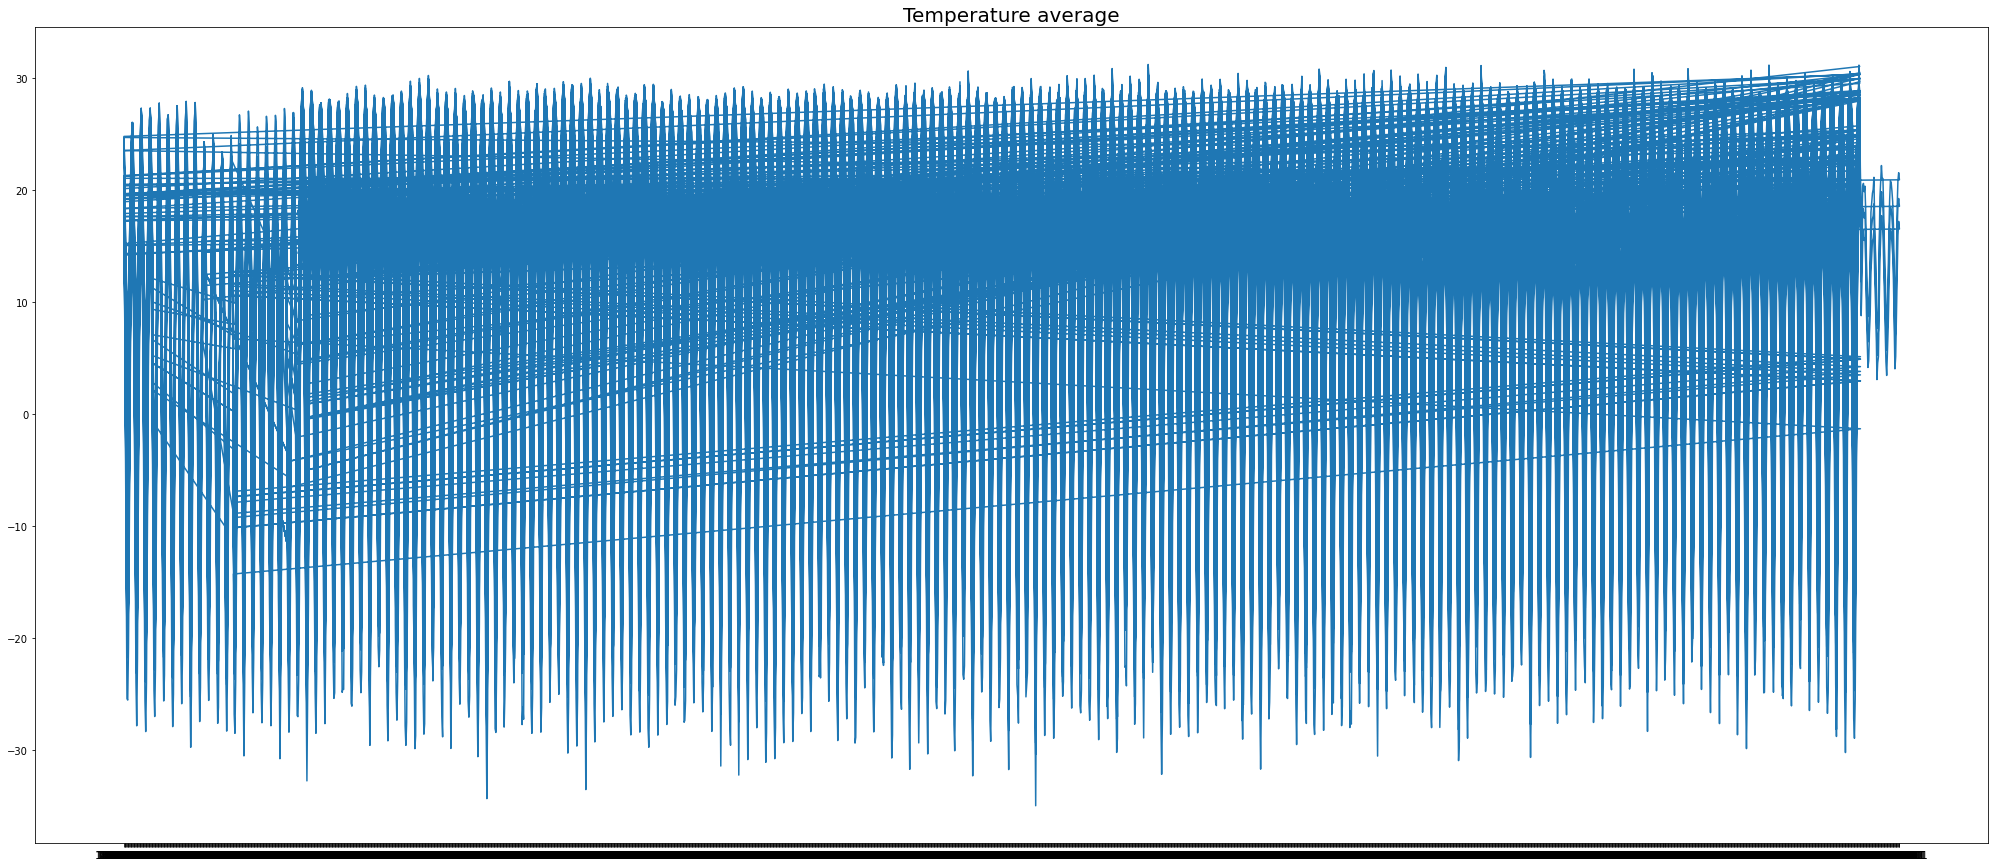

In [ ]:
# meliht data pada grafik

tanggal = df['dt'].values
Avrgtemp  = df['AverageTemperature'].values
 
 
plt.figure(figsize=(35,15))
plt.plot(tanggal, Avrgtemp)
plt.title('Temperature average',
          fontsize=20);

In [ ]:
# split data train dan data test
len_Avg = len(Avrgtemp)
len_train = int(len_Avg*0.8)

temp_train = df[:len_train]
temp_val = df[len_train:]

print('data train sebanyak (80%) :', len(temp_train))
print('data validation sebanyak (20%) :', len(temp_val))

data train sebanyak (80%) : 160000
data validation sebanyak (20%) : 40000


In [ ]:
# fungsi window, merubah data kita menjadi format yang dapat diterima oleh model. 

def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[-1:]))
    return ds.batch(batch_size).prefetch(1)

In [ ]:
# buat model

train_set = windowed_dataset(Avrgtemp, window_size=60, batch_size=100, shuffle_buffer=1000)
test_set = windowed_dataset(Avrgtemp, window_size=60, batch_size=100, shuffle_buffer=1000)
model = tf.keras.models.Sequential([
  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.LSTM(64),
  tf.keras.layers.Dense(32, activation="relu"),
  tf.keras.layers.Dense(16, activation="relu"),
  tf.keras.layers.Dense(1),
])

In [ ]:
# membuat callback

import livelossplot

# inisiasi plot loss
plot_losses = livelossplot.PlotLossesKeras()

# ketika mae < 10%
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('mae')<(range_df*0.1)):
      print('\nnilai max data :', max_df)
      print('\nnilai min data :', min_df)
      print('\nrange data :', range_df)
      print('\n10% dari skala data :', (range_df*0.1))
      print("\nmae telah mencapai <10%! :",logs.get('mae'))
      self.model.stop_training = True
callbacks_end = myCallback()

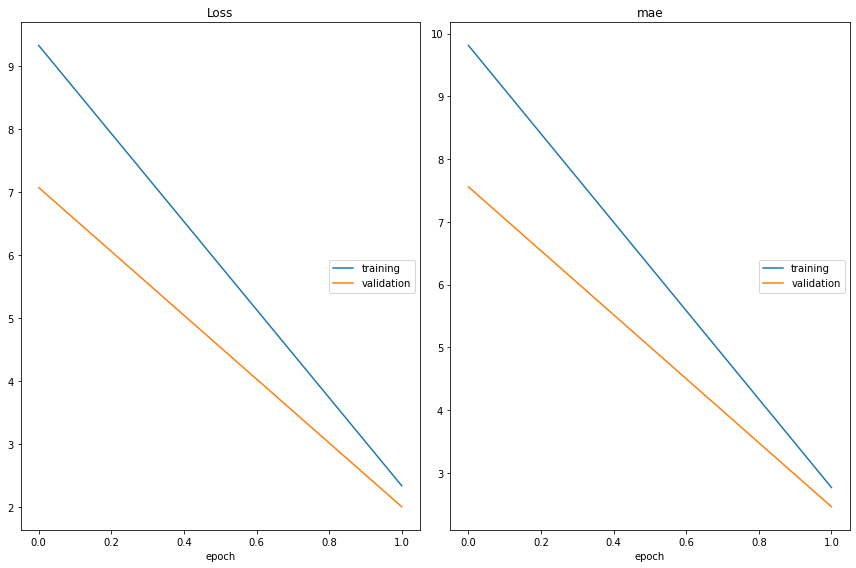

Loss
	training         	 (min:    2.342, max:    9.321, cur:    2.342)
	validation       	 (min:    2.010, max:    7.068, cur:    2.010)
mae
	training         	 (min:    2.769, max:    9.810, cur:    2.769)
	validation       	 (min:    2.462, max:    7.558, cur:    2.462)

nilai max data : 31.233

nilai min data : -34.94

range data : 66.173

10% dari skala data : 6.6173

mae telah mencapai <10%! : 2.7688910961151123
2000/2000 [==============================] - 273s 136ms/step - loss: 2.3421 - mae: 2.7689 - val_loss: 2.0096 - val_mae: 2.4621


In [ ]:
# latih model

optimizer = tf.keras.optimizers.SGD(lr=1.0000e-04, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(train_set,
                    epochs=25,
                    verbose = 1,
                    callbacks=[plot_losses, callbacks_end],
                    validation_data=test_set)

In [ ]:
%tensorboard --logdir logs/fit